In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('forestfires.csv')

In [3]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
df['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [6]:
df['monthaug'].value_counts()

0    333
1    184
Name: monthaug, dtype: int64

In [7]:
df['monthnov'].value_counts()

0    516
1      1
Name: monthnov, dtype: int64

In [8]:
df['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [9]:
df['daysat'].value_counts()

0    433
1     84
Name: daysat, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [11]:
grp=df.groupby('month')

In [12]:
grp.get_group('aug')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
12,aug,fri,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,...,0,0,0,0,0,0,0,0,0,small
23,aug,sat,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,...,0,0,0,0,0,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,...,0,0,0,0,0,0,0,0,0,small
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large


<AxesSubplot:xlabel='month', ylabel='Count'>

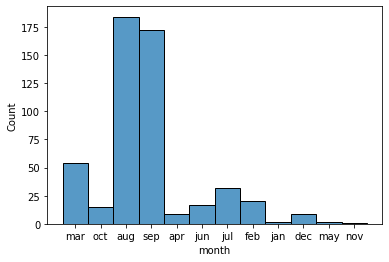

In [13]:
sns.color_palette()
sns.histplot(df['month'])

<AxesSubplot:xlabel='month', ylabel='count'>

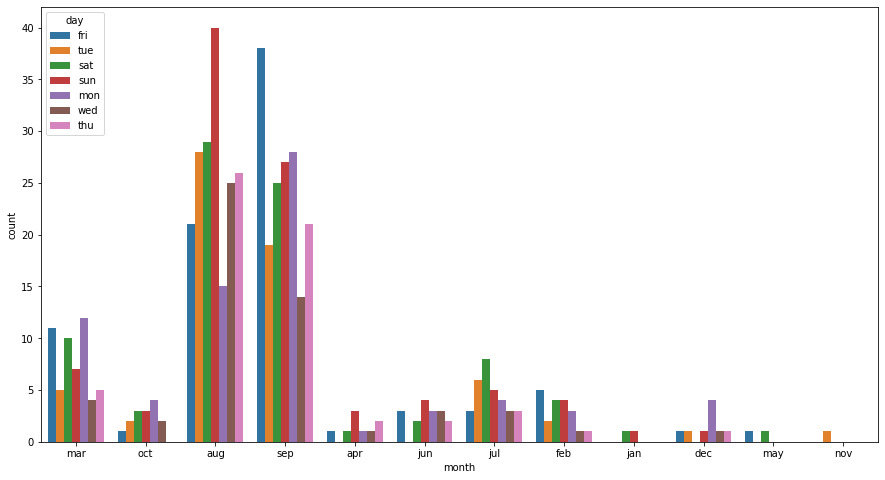

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(df['month'],hue=df['day'])

<AxesSubplot:xlabel='month', ylabel='count'>

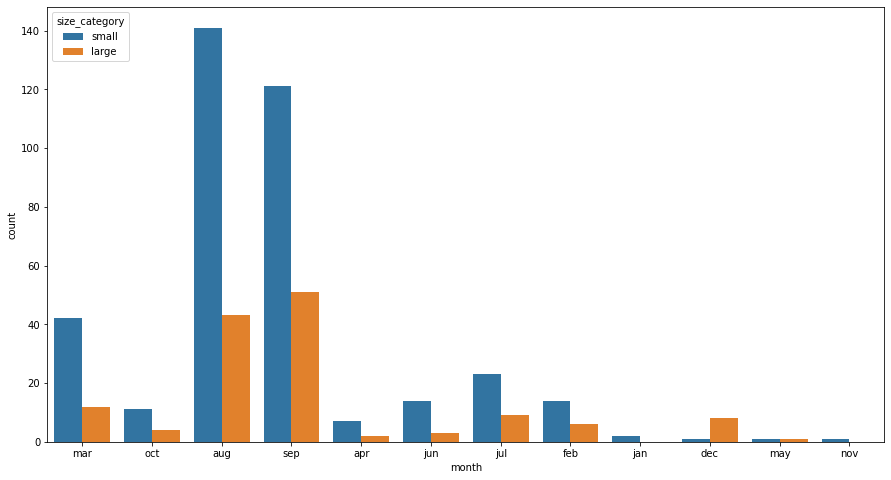

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(df['month'],hue=df['size_category'])

In [16]:
df[['month','temp']]

,month,temp
0,mar,8.2
1,oct,18.0
2,oct,14.6
3,mar,8.3
4,mar,11.4
...,...,...
512,aug,27.8
513,aug,21.9
514,aug,21.2
515,aug,25.6


<AxesSubplot:xlabel='month', ylabel='temp'>

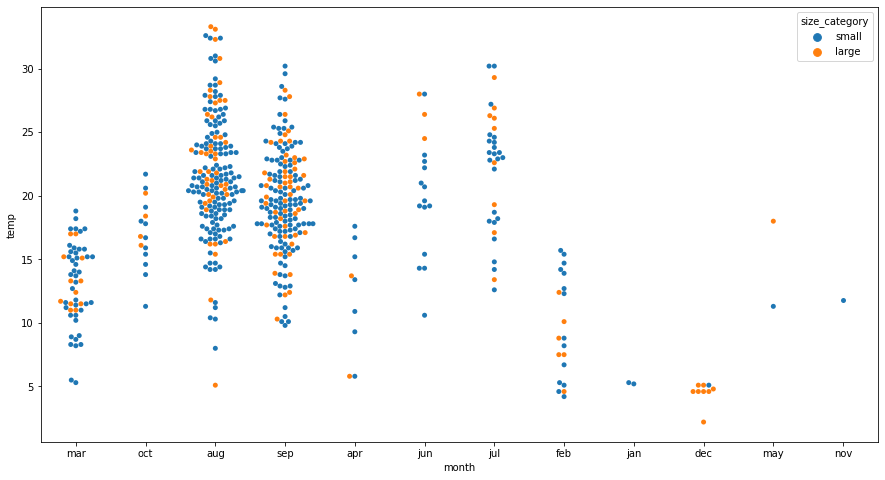

In [17]:
plt.figure(figsize=(15,8))
sns.swarmplot(df['month'],df['temp'],hue=df['size_category'])

<AxesSubplot:xlabel='month', ylabel='temp'>

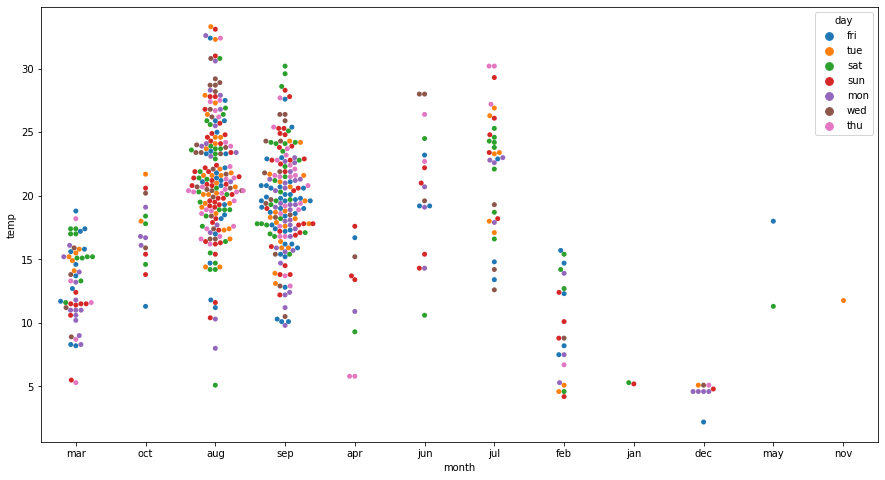

In [18]:
plt.figure(figsize=(15,8))
sns.swarmplot(df['month'],df['temp'],hue=df['day'])

In [19]:
df[['area','size_category']]

,area,size_category
0,0.00,small
1,0.00,small
2,0.00,small
3,0.00,small
4,0.00,small
...,...,...
512,6.44,large
513,54.29,large
514,11.16,large
515,0.00,small


<AxesSubplot:xlabel='area'>

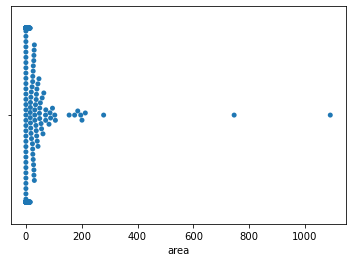

In [20]:
sns.swarmplot(df['area'],hue=df['size_category'])

In [21]:
df[df['temp']>=20]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small
13,sep,mon,90.9,126.5,686.5,7.0,21.3,42,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small
14,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,...,0,0,0,0,0,0,0,0,1,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,...,0,0,0,0,0,0,0,0,0,small
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large


<AxesSubplot:xlabel='month', ylabel='temp'>

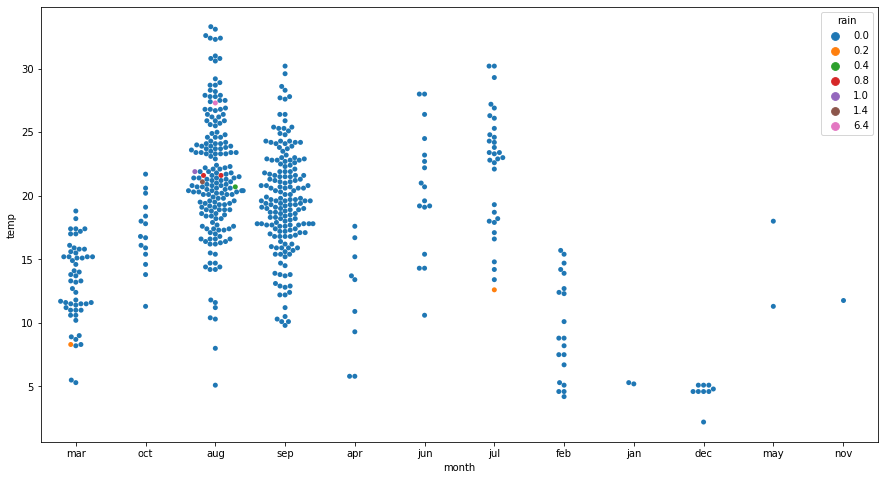

In [22]:
plt.figure(figsize=(15,8))
sns.swarmplot(df['month'],df['temp'],hue=df['rain'])

In [23]:
df_1=df.drop(['month','day'],axis=1)

In [24]:
df_1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [25]:
df_1[df['size_category']=='large']

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
182,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38,0,...,1,0,0,0,0,0,0,0,0,large
183,91.7,48.5,696.1,11.1,16.8,45,4.5,0.0,6.83,0,...,0,0,0,0,0,0,0,1,0,large
184,93.9,135.7,586.7,15.1,20.8,34,4.9,0.0,6.96,1,...,0,0,0,0,0,0,0,0,0,large
185,91.0,129.5,692.6,7.0,17.6,46,3.1,0.0,7.04,0,...,0,0,0,0,0,0,0,0,1,large
186,89.3,51.3,102.2,9.6,11.5,39,5.8,0.0,7.19,0,...,0,0,0,0,1,0,0,0,0,large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82,0,...,0,0,0,0,0,0,0,0,0,large
504,94.5,139.4,689.1,20.0,28.9,29,4.9,0.0,49.59,0,...,0,0,0,0,0,0,0,0,0,large
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large


<AxesSubplot:xlabel='size_category', ylabel='area'>

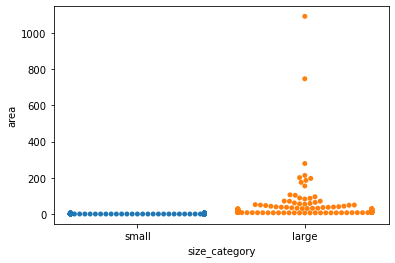

In [26]:
sns.swarmplot(df_1['size_category'],df_1['area'])

In [27]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [28]:
x=df_1.iloc[:,:28]
y=df_1.iloc[:,-1]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(361, 28) (156, 28) (361,) (156,)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Logistic Regression

In [31]:
logis=LogisticRegression(max_iter=300)
model=logis.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.9743589743589743
confusion_matrix:  [[ 45   3]
 [  1 107]]
classification_report:                precision    recall  f1-score   support

       large       0.98      0.94      0.96        48
       small       0.97      0.99      0.98       108

    accuracy                           0.97       156
   macro avg       0.98      0.96      0.97       156
weighted avg       0.97      0.97      0.97       156



In [32]:
x_pred=model.predict(x_train)
print('accuracy_score: ', accuracy_score(x_pred,y_train))
print('confusion_matrix: ', confusion_matrix(x_pred,y_train))
print('classification_report: ', classification_report(x_pred,y_train))

accuracy_score:  0.997229916897507
confusion_matrix:  [[ 93   1]
 [  0 267]]
classification_report:                precision    recall  f1-score   support

       large       1.00      0.99      0.99        94
       small       1.00      1.00      1.00       267

    accuracy                           1.00       361
   macro avg       1.00      0.99      1.00       361
weighted avg       1.00      1.00      1.00       361



# Decision Tree using gini

In [33]:
tree=DecisionTreeClassifier()
model_1=tree.fit(x_train,y_train)
y_pred=model_1.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.9935897435897436
confusion_matrix:  [[ 46   1]
 [  0 109]]
classification_report:                precision    recall  f1-score   support

       large       1.00      0.98      0.99        47
       small       0.99      1.00      1.00       109

    accuracy                           0.99       156
   macro avg       1.00      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [34]:
x_pred_1=model_1.predict(x_train)
print('accuracy_score: ', accuracy_score(x_pred_1,y_train))
print('confusion_matrix: ', confusion_matrix(x_pred_1,y_train))
print('classification_report: ', classification_report(x_pred_1,y_train))

accuracy_score:  1.0
confusion_matrix:  [[ 93   0]
 [  0 268]]
classification_report:                precision    recall  f1-score   support

       large       1.00      1.00      1.00        93
       small       1.00      1.00      1.00       268

    accuracy                           1.00       361
   macro avg       1.00      1.00      1.00       361
weighted avg       1.00      1.00      1.00       361



# Decision Tree using entropy

In [35]:
tree_1=DecisionTreeClassifier(criterion='entropy')
model_2=tree_1.fit(x_train,y_train)
y_pred=model_2.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.9935897435897436
confusion_matrix:  [[ 46   1]
 [  0 109]]
classification_report:                precision    recall  f1-score   support

       large       1.00      0.98      0.99        47
       small       0.99      1.00      1.00       109

    accuracy                           0.99       156
   macro avg       1.00      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [36]:
x_pred_2=model_2.predict(x_train)
print('accuracy_score: ', accuracy_score(x_pred_2,y_train))
print('confusion_matrix: ', confusion_matrix(x_pred_2,y_train))
print('classification_report: ', classification_report(x_pred_2,y_train))

accuracy_score:  1.0
confusion_matrix:  [[ 93   0]
 [  0 268]]
classification_report:                precision    recall  f1-score   support

       large       1.00      1.00      1.00        93
       small       1.00      1.00      1.00       268

    accuracy                           1.00       361
   macro avg       1.00      1.00      1.00       361
weighted avg       1.00      1.00      1.00       361



# Random Forest

In [37]:
random=RandomForestClassifier(n_estimators=150,max_features=10,random_state=0)
model_3=random.fit(x_train,y_train)
y_pred=model_3.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.9935897435897436
confusion_matrix:  [[ 46   1]
 [  0 109]]
classification_report:                precision    recall  f1-score   support

       large       1.00      0.98      0.99        47
       small       0.99      1.00      1.00       109

    accuracy                           0.99       156
   macro avg       1.00      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [38]:
x_pred_3=model_3.predict(x_train)
print('accuracy_score: ', accuracy_score(x_pred_2,y_train))
print('confusion_matrix: ', confusion_matrix(x_pred_2,y_train))
print('classification_report: ', classification_report(x_pred_2,y_train))

accuracy_score:  1.0
confusion_matrix:  [[ 93   0]
 [  0 268]]
classification_report:                precision    recall  f1-score   support

       large       1.00      1.00      1.00        93
       small       1.00      1.00      1.00       268

    accuracy                           1.00       361
   macro avg       1.00      1.00      1.00       361
weighted avg       1.00      1.00      1.00       361



# AdaBoost Classifier

In [39]:
ada=AdaBoostClassifier(base_estimator=tree,n_estimators=150,random_state=0)
model_4=ada.fit(x_train,y_train)
y_pred=model_4.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.9935897435897436
confusion_matrix:  [[ 46   1]
 [  0 109]]
classification_report:                precision    recall  f1-score   support

       large       1.00      0.98      0.99        47
       small       0.99      1.00      1.00       109

    accuracy                           0.99       156
   macro avg       1.00      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [40]:
ada_1=AdaBoostClassifier(base_estimator=tree_1,n_estimators=150,random_state=0)
model_5=ada_1.fit(x_train,y_train)
y_pred=model_5.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.9935897435897436
confusion_matrix:  [[ 46   1]
 [  0 109]]
classification_report:                precision    recall  f1-score   support

       large       1.00      0.98      0.99        47
       small       0.99      1.00      1.00       109

    accuracy                           0.99       156
   macro avg       1.00      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



# SVM

In [41]:
model_6=SVC(kernel='linear')
model_6.fit(x_train,y_train)
y_pred=model_6.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.9871794871794872
confusion_matrix:  [[ 46   2]
 [  0 108]]
classification_report:                precision    recall  f1-score   support

       large       1.00      0.96      0.98        48
       small       0.98      1.00      0.99       108

    accuracy                           0.99       156
   macro avg       0.99      0.98      0.98       156
weighted avg       0.99      0.99      0.99       156



In [42]:
model_7=SVC(kernel='poly')
model_7.fit(x_train,y_train)
y_pred=model_7.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.7564102564102564
confusion_matrix:  [[  8   0]
 [ 38 110]]
classification_report:                precision    recall  f1-score   support

       large       0.17      1.00      0.30         8
       small       1.00      0.74      0.85       148

    accuracy                           0.76       156
   macro avg       0.59      0.87      0.57       156
weighted avg       0.96      0.76      0.82       156



In [43]:
model_6=SVC(kernel='rbf')
model_6.fit(x_train,y_train)
y_pred=model_6.predict(x_test)
print('accuracy_score: ', accuracy_score(y_pred,y_test))
print('confusion_matrix: ', confusion_matrix(y_pred,y_test))
print('classification_report: ', classification_report(y_pred,y_test))

accuracy_score:  0.7243589743589743
confusion_matrix:  [[  3   0]
 [ 43 110]]
classification_report:                precision    recall  f1-score   support

       large       0.07      1.00      0.12         3
       small       1.00      0.72      0.84       153

    accuracy                           0.72       156
   macro avg       0.53      0.86      0.48       156
weighted avg       0.98      0.72      0.82       156



# Conclusion
#### Desicion Tree models are predicting well as compare to all other models.